<a href="https://colab.research.google.com/github/soniamaryc/RobotManipulator_Course/blob/main/Trajectory_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 1: Linear Trajectory

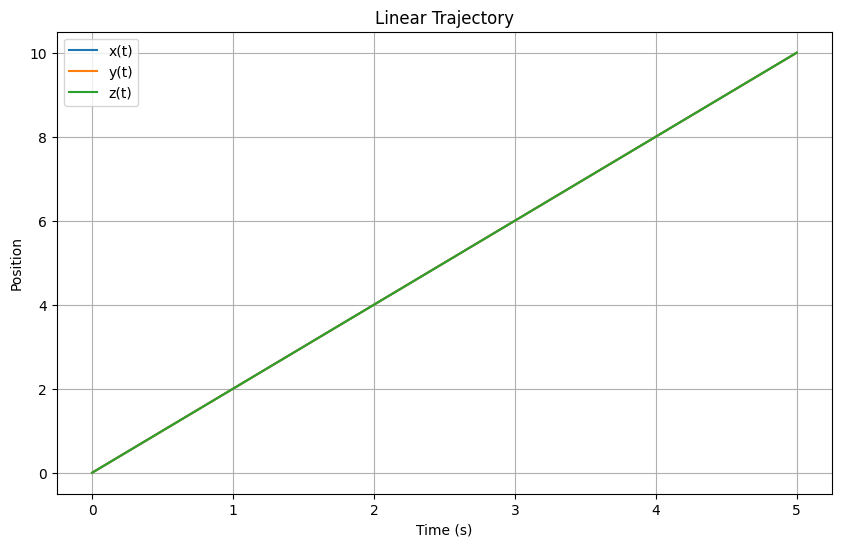

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x0, y0, z0 = 0, 0, 0  # Start point
xf, yf, zf = 10, 10, 10  # End point
T = 5  # Total time (seconds)
N = 100  # Number of steps

# Generate time points
time_points = np.linspace(0, T, N)

# Linear interpolation
x = x0 + (xf - x0) * time_points / T
y = y0 + (yf - y0) * time_points / T
z = z0 + (zf - z0) * time_points / T

# Velocities (constant)
vx = (xf - x0) / T
vy = (yf - y0) / T
vz = (zf - z0) / T

# Plot positions
plt.figure(figsize=(10, 6))
plt.plot(time_points, x, label="x(t)")
plt.plot(time_points, y, label="y(t)")
plt.plot(time_points, z, label="z(t)")
plt.title("Linear Trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()


Program 2:Cubic Trajectory

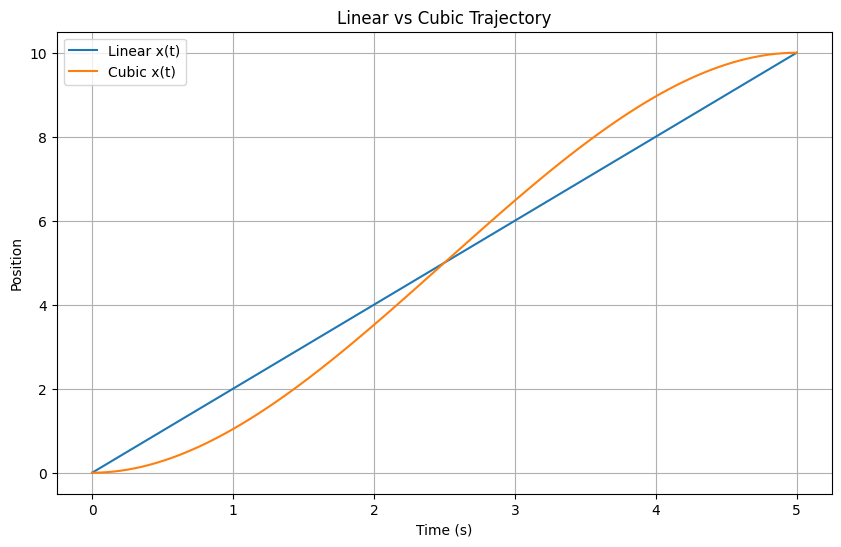

In [6]:
# Cubic coefficients for x-axis
a0_x = x0
a1_x = 0
a2_x = 3 * (xf - x0) / (T**2)
a3_x = -2 * (xf - x0) / (T**3)

# Compute cubic positions, velocities, accelerations
x_cubic = a0_x + a1_x * time_points + a2_x * time_points**2 + a3_x * time_points**3
v_cubic = a1_x + 2 * a2_x * time_points + 3 * a3_x * time_points**2
a_cubic = 2 * a2_x + 6 * a3_x * time_points

# Repeat for y and z if needed, or keep them linear for simplicity

# Plot positions and compare
plt.figure(figsize=(10, 6))
plt.plot(time_points, x, label="Linear x(t)")
plt.plot(time_points, x_cubic, label="Cubic x(t)")
plt.title("Linear vs Cubic Trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()


Program 3:**PID Control to Follow a Cubic Trajectory**

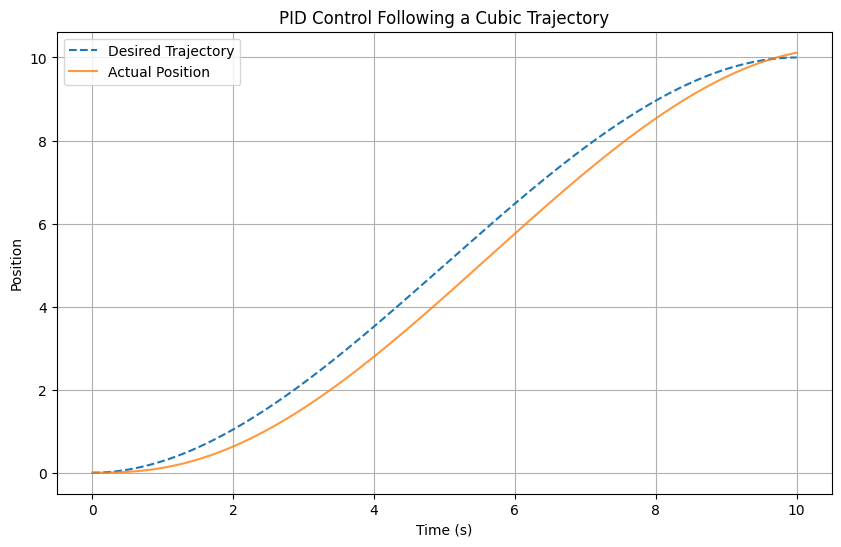

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the desired trajectory (cubic interpolation)
T = 10.0  # Total time (seconds)
N = 200  # Number of steps
time_points = np.linspace(0, T, N)
x0 = 0  # Start position
xf = 10  # End position

# Coefficients for cubic polynomial (ensuring zero initial and final velocity)
a0 = x0
a1 = 0
a2 = 3 * (xf - x0) / (T**2)
a3 = -2 * (xf - x0) / (T**3)

# Desired position, velocity, acceleration
x_desired = a0 + a1 * time_points + a2 * time_points**2 + a3 * time_points**3
v_desired = a1 + 2 * a2 * time_points + 3 * a3 * time_points**2
a_desired = 2 * a2 + 6 * a3 * time_points

# Step 2: Implement PID control
Kp = 1.5
Ki = 0.1
Kd = 0.05
dt = T / N

# Initial state
current_position = 0
integral = 0
prev_error = x_desired[0]
actual_positions = []

# Step 3: Simulation loop
for i in range(N):
    # Desired position at current time
    target_position = x_desired[i]

    # PID calculations
    error = target_position - current_position
    integral += error * dt
    derivative = (error - prev_error) / dt
    control_effort = Kp * error + Ki * integral + Kd * derivative

    # Update current position based on control effort
    current_position += control_effort * dt

    # Store for visualization
    actual_positions.append(current_position)

    # Update previous error
    prev_error = error

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, x_desired, label="Desired Trajectory", linestyle='--')
plt.plot(time_points, actual_positions, label="Actual Position", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("PID Control Following a Cubic Trajectory")
plt.legend()
plt.grid()
plt.show()
